#### Etapa de Entrenamiento y Evaluación del Modelo de Aprendizaje Supervisado de Regresión

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import pickle
from pickle import dump
from joblib import dump
import seaborn as sns

Ya que algunos algoritmos como los lineales y los de Boosting exigen tener los datos
normalizados, pues se procede a realizar dicho paso.

In [2]:
dataframe = pd.read_csv('../data/processed/data_clean.csv')
dataframe.head()

,PLAYER_ID,PTS,MIN_PROM,FGM_PROM,FGA_PROM,FG3M_PROM,FG3A_PROM,FTM_PROM,FTA_PROM,OREB_PROM,DREB_PROM,AST_PROM,TOV_PROM,STL_PROM,BLK_PROM,BLKA_PROM,PF_PROM,PFD_PROM,PTS_PROM,PLUS_MINUS_PROM
0,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,3.00,5.000000,4.00,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000
1,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,3.00,5.000000,4.00,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000
2,2544,18,29.875000,7.5,17.5,3.000000,8.0,4.000000,5.50,1.50,4.50,7.500000,4.00,0.500000,0.00,1.000000,1.00,5.000000,22.000000,9.000000
3,2544,29,28.650000,7.0,16.0,2.333333,7.0,4.333333,6.00,1.00,6.00,6.666667,4.00,0.666667,0.00,0.666667,1.00,5.333333,20.666667,11.333333
4,2544,26,30.466667,8.0,17.0,2.500000,7.0,4.250000,5.75,1.25,6.25,6.500000,3.75,1.000000,0.25,1.000000,1.25,4.750000,22.750000,8.500000


In [3]:
#Se separan los datos de entrenamiento y prueba

X = dataframe.drop(['PTS'], axis = 1)
y = dataframe['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
#Se realiza la normalización de los datos

#Columnas de las variables predictoras
n_columns = X.columns.tolist()

#Se inicializa la función
scaler = StandardScaler()


#Se ajusta el scaler a los datos de entrenamiento
scaler.fit(X_train)

# Se guarda el scaler 
dump(scaler, 'scaler.joblib')


X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = n_columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = n_columns)

In [5]:
X_test_scaled.columns

Index(['PLAYER_ID', 'MIN_PROM', 'FGM_PROM', 'FGA_PROM', 'FG3M_PROM',
       'FG3A_PROM', 'FTM_PROM', 'FTA_PROM', 'OREB_PROM', 'DREB_PROM',
       'AST_PROM', 'TOV_PROM', 'STL_PROM', 'BLK_PROM', 'BLKA_PROM', 'PF_PROM',
       'PFD_PROM', 'PTS_PROM', 'PLUS_MINUS_PROM'],
      dtype='object')

In [6]:
X_test_scaled.head()

,PLAYER_ID,MIN_PROM,FGM_PROM,FGA_PROM,FG3M_PROM,FG3A_PROM,FTM_PROM,FTA_PROM,OREB_PROM,DREB_PROM,AST_PROM,TOV_PROM,STL_PROM,BLK_PROM,BLKA_PROM,PF_PROM,PFD_PROM,PTS_PROM,PLUS_MINUS_PROM
32182,0.658931,0.587941,0.740498,0.979923,0.960608,0.763749,-0.139991,0.137703,1.114954,2.207345,-0.155964,0.360852,-0.561365,1.842957,0.355121,0.375555,0.721569,0.643615,-0.870403
53479,-1.494717,0.878471,0.047690,-0.285500,-1.091694,-1.196499,1.710360,1.664684,2.832174,1.634077,-0.721350,0.156958,-0.196265,1.842957,-0.109524,1.457926,1.601530,0.282614,-1.809369
60887,0.663165,0.401242,0.124668,0.251346,-0.345402,-0.020350,-0.718226,-0.816660,-0.602267,0.296450,0.032497,-0.862514,0.168836,-0.091837,-0.574170,-0.273868,-1.038352,-0.133925,-0.000991
55277,-1.493954,0.851699,1.433306,1.094962,0.400890,0.528519,2.635535,2.332738,2.402869,1.442987,-0.250195,0.156958,0.168836,1.069039,-0.109524,0.808503,2.230073,1.726616,-0.661744
46641,0.665523,0.054723,-1.106991,-1.062009,-1.091694,-1.176896,-0.949520,-1.007533,0.578322,-0.921745,-0.391542,0.768641,0.077561,0.585341,0.122799,0.429673,-0.849789,-1.189157,1.346599


Se evaluarán varios modelos en su forma estándar y a partir de allí se decidirá cuales procederá a la fase de optimización.

In [7]:
modelos = {"lineal" : LinearRegression(),
           "lasso" : Lasso(),
           "ridge" : Ridge(),
           "decision_tree" : DecisionTreeRegressor(),
           "random_forest" : RandomForestRegressor(),
           "boosting" :  XGBRegressor(),
           "kneighbors": KNeighborsRegressor()}

In [8]:
def prueba_modelos(modelos, X_train, X_test, y_train, y_test):

  result_training = {}

  for names, model in modelos.items():

    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    r2_score_ = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    result_training[names] = (r2_score_, rmse)

  return result_training

In [9]:
resultados_base = prueba_modelos(modelos=modelos, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test)
for key, values in resultados_base.items():
    print(f"{key}:")
    print(f"  Coeficiente de determinación (R^2): {values[0]}")
    print(f"  RMSE: {values[1]}\n")
    
    resultados = (values[0], values[1])
    
    # Asignar la tupla como el valor de la variable correspondiente
    globals()[key] = resultados

lineal:
  Coeficiente de determinación (R^2): 0.5240179923109516
  RMSE: 6.043000325397261

lasso:
  Coeficiente de determinación (R^2): 0.5047482997046095
  RMSE: 6.1641093866107175

ridge:
  Coeficiente de determinación (R^2): 0.5240181158633385
  RMSE: 6.042999541095386

decision_tree:
  Coeficiente de determinación (R^2): 0.023482757516123165
  RMSE: 8.655602574486482

random_forest:
  Coeficiente de determinación (R^2): 0.5128962122321303
  RMSE: 6.113192937754883

boosting:
  Coeficiente de determinación (R^2): 0.5057856678448045
  RMSE: 6.157650244020069

kneighbors:
  Coeficiente de determinación (R^2): 0.46013960332259296
  RMSE: 6.435733977015343



El modelo que fue superior a todos tanto en el parámetro del Coeficiente de Determinación (R^2) como también en el RMSE, fue el modelo Ridge. Los seguientes en rendimiento fueron el Lineal, el Random Forest y el Boosting; ya que el lineal no cuenta con posibilidad de optimización por hiperparámetros, se tomarán los modelos Ridge, Random Forest y Boosting para la etapa de optimización.

Primero se aplicará un RandomSearch para conocer en qué rango de valores están los mejores hiperparámetros y luego un GridSearch para optimizar la búsqueda de los mismos.

##### Optimización de Ridge

In [10]:
#Definición de parámetros
parametros = {'alpha': np.linspace(0,100,201),
              'max_iter': [1000, 2500, 5000, 10000, 15000]}

In [11]:
#Entrenamiento del modelo con RandomSearch
modelo = Ridge(random_state=42)
random_model = RandomizedSearchCV(estimator = modelo, param_distributions = parametros, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
random_model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29...
        67.5,  68. ,  68.5,  69. ,  69.5,  70. ,  70.5,  71. ,  71.5,
        72. ,  72.5,  73. ,  73.5,  74. ,  74.5,  75. ,  75.5,  76. ,
        76.5,  77. ,  77.5,  78. ,  78.5,  79. ,  79.5,  80. ,  80.5,
        81. ,  81.5,  82. ,  82.5,  83. ,  83.5,  84. ,  84.5,  85. ,
        85.5,  86. ,  86.5,  87. ,  87.5,  88. ,  88.5,  89. ,  89.5,
        90. ,  90.5,  91. ,  91.5,  92. ,  92.5,  93. ,  93.5,  94. ,
        94.5,  95. ,  95.5,  96. ,  96.5,  97. ,  97.5,  98. ,  98.5,
        99. ,  99.5, 100. ]),
                                        'max_iter': [1000, 2500, 5000, 10000,
                                                     15000]},
                   scoring='neg_root_mean_squared_error')

In [12]:
#Mejores parámetros
random_model.best_params_

{'max_iter': 5000, 'alpha': 35.0}

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.48245e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


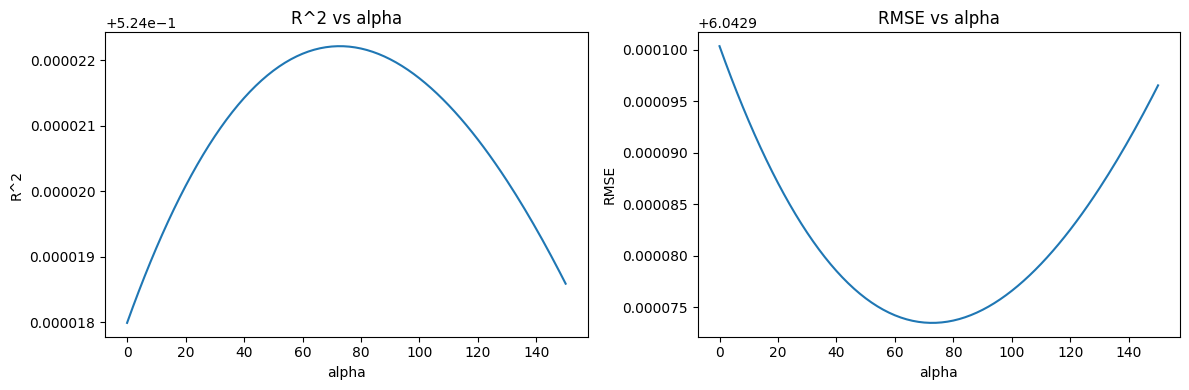

In [13]:
prueba_alpha = list(range(151))
r2 = []
error = []

for i in prueba_alpha:

    model = Ridge(alpha = i)
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, y_predict))
    error.append(np.sqrt(mean_squared_error(y_test, y_predict)))

fig, axis = plt.subplots(1, 2, figsize=(12,4))

axis[0].plot(prueba_alpha, r2)
axis[0].set_title('R^2 vs alpha')
axis[0].set_xlabel('alpha')
axis[0].set_ylabel('R^2')

axis[1].plot(prueba_alpha, error)
axis[1].set_title('RMSE vs alpha')
axis[1].set_xlabel('alpha')
axis[1].set_ylabel('RMSE')


axis[0].ticklabel_format(style='plain')  # Desactiva la notación científica
axis[1].ticklabel_format(style='plain')  # Desactiva la notación científica

plt.tight_layout()

plt.show()

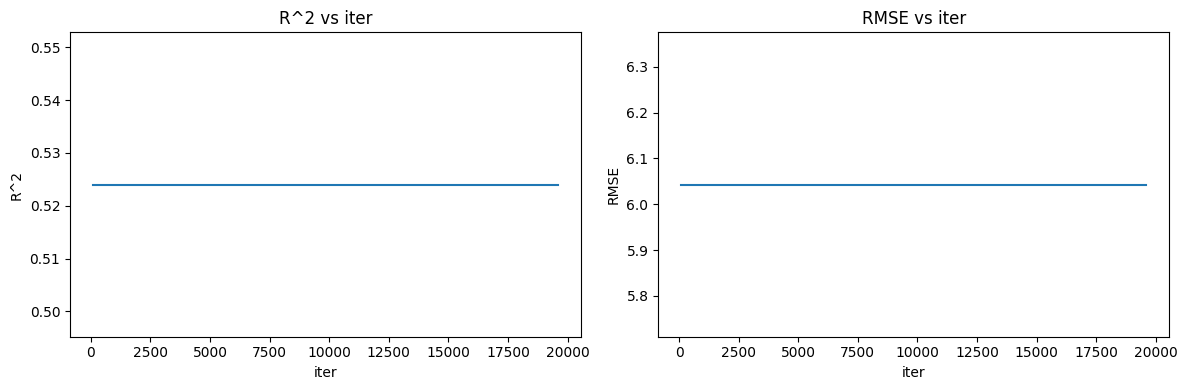

In [14]:
prueba_iter = list(np.arange(100,20001,500))

r2 = []
error = []

for i in prueba_iter:

    model = Ridge(max_iter = i)
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, y_predict))
    error.append(np.sqrt(mean_squared_error(y_test, y_predict)))

fig, axis = plt.subplots(1, 2, figsize=(12,4))

axis[0].plot(prueba_iter, r2)
axis[0].set_title('R^2 vs iter')
axis[0].set_xlabel('iter')
axis[0].set_ylabel('R^2')

axis[1].plot(prueba_iter, error)
axis[1].set_title('RMSE vs iter')
axis[1].set_xlabel('iter')
axis[1].set_ylabel('RMSE')

plt.tight_layout()

plt.show()

- Gracias a ambos gráficos, se hace aun más evidente que para valores de alpha entre 60 y 80 el Coef. de Determinación tiene un máximo y el RMSE presenta un mínimo.

- Además se evidencia que el parámetro max_iter no influye en en R^2 ni en el RMSE.

In [15]:
parametros2 = {'alpha': np.arange(60,80.005,0.05)}

In [16]:
#Entrenamiento del modelo con GridSearch
modelo = Ridge(random_state=42)
grid_model = GridSearchCV(estimator = modelo, param_grid = parametros2, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([60.  , 60.05, 60.1 , 60.15, 60.2 , 60.25, 60.3 , 60.35, 60.4 ,
       60.45, 60.5 , 60.55, 60.6 , 60.65, 60.7 , 60.75, 60.8 , 60.85,
       60.9 , 60.95, 61.  , 61.05, 61.1 , 61.15, 61.2 , 61.25, 61.3 ,
       61.35, 61.4 , 61.45, 61.5 , 61.55, 61.6 , 61.65, 61.7 , 61.75,
       61.8 , 61.85, 61.9 , 61.95, 62.  , 62.05, 62.1 , 62.15, 62.2 ,
       62.25, 62.3 , 62.35, 6...
       77.1 , 77.15, 77.2 , 77.25, 77.3 , 77.35, 77.4 , 77.45, 77.5 ,
       77.55, 77.6 , 77.65, 77.7 , 77.75, 77.8 , 77.85, 77.9 , 77.95,
       78.  , 78.05, 78.1 , 78.15, 78.2 , 78.25, 78.3 , 78.35, 78.4 ,
       78.45, 78.5 , 78.55, 78.6 , 78.65, 78.7 , 78.75, 78.8 , 78.85,
       78.9 , 78.95, 79.  , 79.05, 79.1 , 79.15, 79.2 , 79.25, 79.3 ,
       79.35, 79.4 , 79.45, 79.5 , 79.55, 79.6 , 79.65, 79.7 , 79.75,
       79.8 , 79.85, 79.9 , 79.95, 80.  ])},
             scoring='neg_root_mean_squared_error')

In [17]:
#Mejores parámetros
grid_model.best_params_

{'alpha': 60.0}

In [18]:
model_opt_ridge = Ridge(alpha = 60, random_state = 42)
model_opt_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=60, random_state=42)

In [19]:
y_pred_opt_ridge = model_opt_ridge.predict(X_test_scaled)
r2_score_opt_ridge = r2_score(y_test, y_pred_opt_ridge)
rmse_opt_ridge = np.sqrt(mean_squared_error(y_test, y_pred_opt_ridge))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_ridge}')
print(f'El RMSE fue de: {rmse_opt_ridge} puntos.')

El coeficiente de determinación R^2 fue de: 0.5240221015676133
El RMSE fue de: 6.04297424006994 puntos.


In [20]:
#Para comparar la predicción con el conjunto train
y_pred_opt_ridge_train = model_opt_ridge.predict(X_train_scaled)
r2_score_opt_ridge_train = r2_score(y_train, y_pred_opt_ridge_train)
rmse_opt_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_opt_ridge_train))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_ridge_train}')
print(f'El RMSE fue de: {rmse_opt_ridge_train} puntos.')

El coeficiente de determinación R^2 fue de: 0.5201959640192473
El RMSE fue de: 6.064884055963306 puntos.


Se evidencia que el rendimiento del modelo para el conjunto train y test es bastante similar en ambas métricas. Por lo tanto se descarta el overfitting.

In [88]:
print(f'El % cambio R^2 entre modelo Ridge base y Optimizado fue de: {round(((r2_score_opt_ridge - ridge[0]) / ridge[0]) * 100,5)} %\n')

print(f'El % cambio RMSE entre modelo Ridge base y Optimizado fue de: {round(((rmse_opt_ridge - ridge[1]) / ridge[1]) * 100,5)} %')

El % cambio R^2 entre modelo Ridge base y Optimizado fue de: 0.00076 %

El % cambio RMSE entre modelo Ridge base y Optimizado fue de: -0.00042 %


Esto demuestra que el R^2 mejoró un poco en el modelo optimizado y el RMSE también, ambas métricas tuvieron una leve mejoría ya que el R^2 aumentó y el RMSE disminuyó. 

##### Optimización de Random Forest

In [90]:
#Definición de parámetros
parametros = {
            'n_estimators'      : [200, 250, 300],
            'max_depth'         : [6, 8, 10, None],
            'min_samples_split' : [8, 12, 16],
            'min_samples_leaf'  : [200, 250, 300]
            }

In [91]:
#Entrenamiento del modelo con RandomSearch
modelo = RandomForestRegressor(random_state=42)
random_model = RandomizedSearchCV(estimator = modelo, param_distributions = parametros, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
random_model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10, None],
                                        'min_samples_leaf': [200, 250, 300],
                                        'min_samples_split': [8, 12, 16],
                                        'n_estimators': [200, 250, 300]},
                   scoring='neg_root_mean_squared_error')

In [92]:
random_model.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'min_samples_leaf': 200,
 'max_depth': None}

In [93]:
parametros2 = {
            'n_estimators'      : [225, 250, 275],
            'max_depth'         : [None], #Default
            'min_samples_split' : [2, 6, 8],
            'min_samples_leaf'  : [50, 100, 150]
            }

In [94]:
#Entrenamiento del modelo con GridSearch
modelo = RandomForestRegressor(random_state=42)
grid_model = GridSearchCV(estimator = modelo, param_grid = parametros2, 
                          n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [2, 6, 8],
                         'n_estimators': [225, 250, 275]},
             scoring='neg_root_mean_squared_error')

In [95]:
grid_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'n_estimators': 275}

Otro GridSearch para acotar min_samples_leaf

In [105]:
parametros3 = {
            'n_estimators'      : [275],
            'max_depth'         : [None], #Default
            'min_samples_split' : [2],#Default
            'min_samples_leaf'  : [40, 50, 60]
            }

In [106]:
#Entrenamiento del modelo con GridSearch
modelo = RandomForestRegressor(random_state=42)
grid_model2 = GridSearchCV(estimator = modelo, param_grid = parametros3, 
                          n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [2], 'n_estimators': [275]},
             scoring='neg_root_mean_squared_error')

In [107]:
grid_model2.best_params_

{'max_depth': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'n_estimators': 275}

In [108]:
model_opt_rf = RandomForestRegressor(min_samples_leaf = 50, n_estimators = 275, random_state = 42)
model_opt_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(min_samples_leaf=50, n_estimators=275, random_state=42)

In [109]:
y_pred_opt_rf = model_opt_rf.predict(X_test_scaled)
r2_score_opt_rf = r2_score(y_test, y_pred_opt_rf)
rmse_opt_rf = np.sqrt(mean_squared_error(y_test, y_pred_opt_rf))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_rf}')
print(f'El RMSE fue de: {rmse_opt_rf} puntos.')

El coeficiente de determinación R^2 fue de: 0.524440499590304
El RMSE fue de: 6.040317683586205 puntos.


In [110]:
#Para comparar la predicción con el conjunto train
y_pred_opt_rf_train = model_opt_rf.predict(X_train_scaled)
r2_score_opt_rf_train = r2_score(y_train, y_pred_opt_rf_train)
rmse_opt_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_opt_rf_train))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_rf_train}')
print(f'El RMSE fue de: {rmse_opt_rf_train} puntos.')

El coeficiente de determinación R^2 fue de: 0.5702131251108051
El RMSE fue de: 5.7400692070452815 puntos.


Se evidencia que el rendimiento del modelo para el conjunto train y test están en orden de magnitud similar para ambas métricas. Por lo tanto se descarta el overfitting.

In [112]:
print(f'El % cambio R^2 entre modelo RandomForest base y Optimizado fue de: {round(((r2_score_opt_rf - random_forest[0]) / random_forest[0]) * 100,5)} %\n')

print(f'El % cambio RMSE entre modelo Randomforest base y Optimizado fue de: {round(((rmse_opt_rf - random_forest[1]) / random_forest[1]) * 100,5)} %')

El % cambio R^2 entre modelo RandomForest base y Optimizado fue de: 2.2508 %

El % cambio RMSE entre modelo Randomforest base y Optimizado fue de: -1.1921 %


Esto demuestra que el R^2 mejoró en el modelo optimizado y el RMSE también; ambas métricas tuvieron mejoría ya que el R^2 aumentó y el RMSE disminuyó. 

##### Optimización de XGBoost

In [47]:
parametros = {
            'n_estimators'      : [100, 150, 200, 250],
            'learning_rate'     : [0.1, 0.3, 0.5],
            'subsample'         : [0.5, 1],
            'max_depth'         : [8, 15, 20],
            'gamma'             : [4, 8, 12],
            'min_child_weight'  : [8, 10, 12, 14]
            }

In [48]:
#Entrenamiento del modelo con RandomSearch
modelo = XGBRegressor(random_state=42)
random_model = RandomizedSearchCV(estimator = modelo, param_distributions = parametros, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
random_model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [4, 8, 12],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [8, 15, 20],
                                        'min_child_weight': [8, 10, 12, 14],
                                        'n_estimators': [100, 150, 200, 250],
                                        'subsample': [0.5, 1]},
                   scoring='neg_root_mean_squared_error')

In [49]:
random_model.best_params_

{'subsample': 1,
 'n_estimators': 150,
 'min_child_weight': 14,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 12}

In [75]:
parametros2 = {
            'n_estimators'      : [250, 275, 300],
            'learning_rate'     : [0.1],#Valor por defecto
            'subsample'         : [1],#Valor por defecto
            'max_depth'         : [3, 6, 9],
            'gamma'             : [8, 12, 16],
            'min_child_weight'  : [200, 250, 300]
            }

In [76]:
#Entrenamiento del modelo con GridSearch
modelo = XGBRegressor(random_state=42)
grid_model = GridSearchCV(estimator = modelo, param_grid = parametros2, 
                          n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [8, 12, 16], 'learning_rate': [0.1],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [200, 250, 300],
                         'n_estimators': [250, 275, 300], 'subsample': [1]},
             scoring='neg_root_mean_squared_error')

In [77]:
#Mejores parámetros
grid_model.best_params_

{'gamma': 12,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 250,
 'n_estimators': 275,
 'subsample': 1}

In [78]:
model_opt_xgb = XGBRegressor(gamma = 12, max_depth = 3, min_child_weight = 250, n_estimators = 275, random_state = 42)
model_opt_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=12, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=250, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=275, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [81]:
y_pred_opt_xgb = model_opt_xgb.predict(X_test_scaled)
r2_score_opt_xgb = r2_score(y_test, y_pred_opt_xgb)
rmse_opt_xgb = np.sqrt(mean_squared_error(y_test, y_pred_opt_xgb))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_xgb}')
print(f'El RMSE fue de: {rmse_opt_xgb} puntos.')

El coeficiente de determinación R^2 fue de: 0.5213919260426162
El RMSE fue de: 6.059647478923935 puntos.


In [82]:
#Para comparar la predicción con el conjunto train
y_pred_opt_xgb_train = model_opt_xgb.predict(X_train_scaled)
r2_score_opt_xgb_train = r2_score(y_train, y_pred_opt_xgb_train)
rmse_opt_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_opt_xgb_train))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_xgb_train}')
print(f'El RMSE fue de: {rmse_opt_xgb_train} puntos.')

El coeficiente de determinación R^2 fue de: 0.5548878289843706
El RMSE fue de: 5.841512215160362 puntos.


Se evidencia que el rendimiento del modelo para el conjunto train y test es bastante similar en ambas métricas. Por lo tanto se descarta el overfitting.

In [87]:
print(f'El % cambio R^2 entre modelo Boosting base y Optimizado fue de: {round(((r2_score_opt_xgb - boosting[0]) / boosting[0]) * 100,5)} %\n')

print(f'El % cambio RMSE entre modelo Boosting base y Optimizado fue de: {round(((rmse_opt_xgb - boosting[1]) / boosting[1]) * 100,5)} %')

El % cambio R^2 entre modelo Boosting base y Optimizado fue de: 3.08555 %

El % cambio RMSE entre modelo Boosting base y Optimizado fue de: -1.59156 %


Esto demuestra que el R^2 mejoró en el modelo optimizado y el RMSE también; ambas métricas tuvieron mejoría ya que el R^2 aumentó y el RMSE disminuyó. 

##### Comparación R^2 y RMSE para los tres modelos optimizados

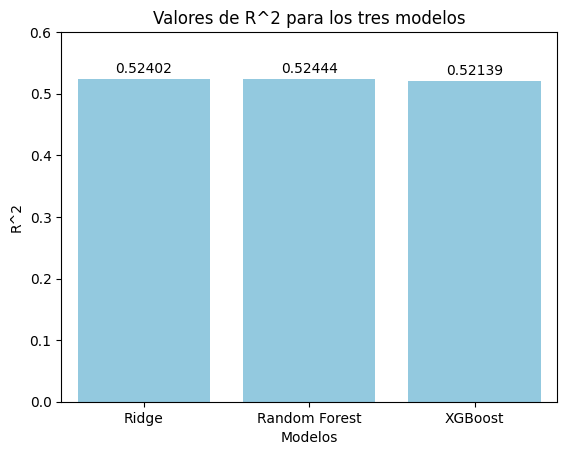

In [121]:
modelos = ['Ridge', 'Random Forest', 'XGBoost']
r2_modelos = [r2_score_opt_ridge, r2_score_opt_rf, r2_score_opt_xgb]

df_r2 = pd.DataFrame({'Modelo': modelos,'R2': r2_modelos})

ax = sns.barplot(data=df_r2, x='Modelo', y='R2', color='skyblue')
plt.title('Valores de R^2 para los tres modelos')
plt.xlabel('Modelos')
plt.ylabel('R^2')

plt.ylim(0, 0.6)

for i, value in enumerate(r2_modelos):
    ax.text(i, value + 0.01, f"{value:.5f}", color='black', ha="center")

plt.show()

Se observa que el modelo Random Forest fue ligeramente superior al resto respecto al R^2.

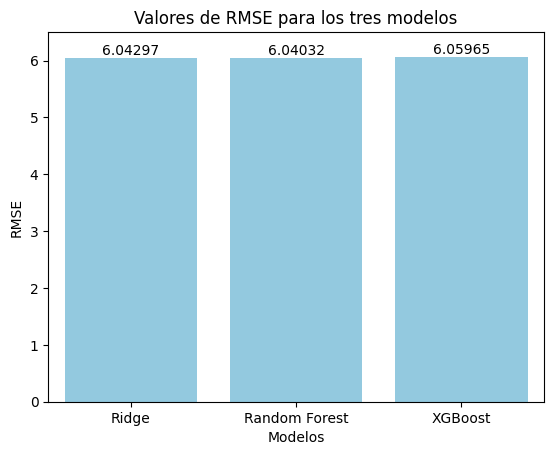

In [125]:
modelos = ['Ridge', 'Random Forest', 'XGBoost']
rmse_modelos = [rmse_opt_ridge, rmse_opt_rf, rmse_opt_xgb]

df_rmse = pd.DataFrame({'Modelo': modelos,'RMSE': rmse_modelos})

ax = sns.barplot(data=df_rmse, x='Modelo', y='RMSE', color='skyblue')
plt.title('Valores de RMSE para los tres modelos')
plt.xlabel('Modelos')
plt.ylabel('RMSE')

plt.ylim(0, 6.5)

for i, value in enumerate(rmse_modelos):
    ax.text(i, value + 0.06, f"{value:.5f}", color='black', ha="center")

plt.show()

Se observa que el modelo Random Forest tuvo el menor RMSE, por lo cual es el mejor en esta métrica.

De acuerdo a lo observado y explicado en los dos gráficos anteriores, se decide usar el Random Forest como modelo predictivo final.

In [138]:
feature_importance = model_opt_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)
print(feature_importance_df)

           Variable  Importancia
3          FGA_PROM     0.762101
17         PTS_PROM     0.139655
1          MIN_PROM     0.012879
0         PLAYER_ID     0.010859
16         PFD_PROM     0.008780
7          FTA_PROM     0.007707
18  PLUS_MINUS_PROM     0.007449
10         AST_PROM     0.006473
6          FTM_PROM     0.006321
9         DREB_PROM     0.005977
11         TOV_PROM     0.005941
5         FG3A_PROM     0.004352
15          PF_PROM     0.003911
8         OREB_PROM     0.003775
2          FGM_PROM     0.003101
12         STL_PROM     0.003031
4         FG3M_PROM     0.002824
13         BLK_PROM     0.002629
14        BLKA_PROM     0.002235


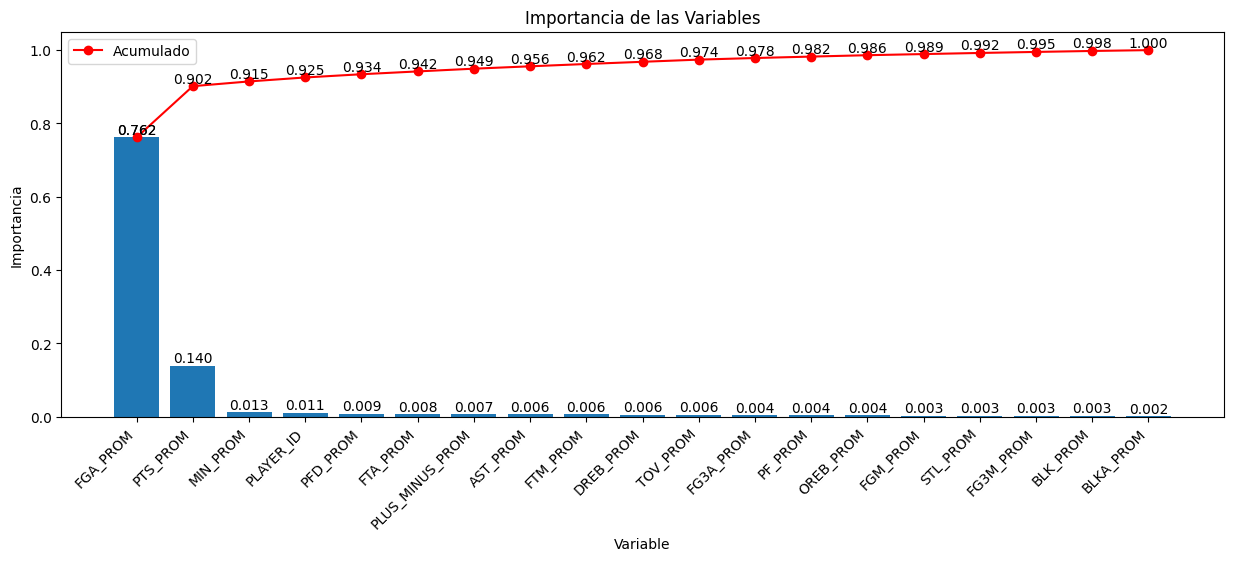

In [157]:
# Calcular el acumulado de importancias
cumulative_importance = feature_importance_df['Importancia'].cumsum()

plt.figure(figsize=(15, 5))
bar_plot = plt.bar(feature_importance_df['Variable'], feature_importance_df['Importancia'])
plt.plot(feature_importance_df['Variable'], cumulative_importance, color='red', marker='o', label='Acumulado')

plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')

plt.xticks(rotation=45, ha='right') 

plt.legend()

# Agregar etiquetas a cada barra
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

# Agregar etiquetas a cada punto en la línea acumulada
for x, y in zip(feature_importance_df['Variable'], cumulative_importance):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.show()

Probamos con las 5 variables que más influyeron la la generación del modelo predictivo (aportan alrededor del 94% de la varianza acumulada), para hacer más sencillo el modelo.

In [18]:
dataframe_new = pd.read_csv('../data/processed/data_clean.csv')
dataframe_new.head()

,PLAYER_ID,PTS,MIN_PROM,FGM_PROM,FGA_PROM,FG3M_PROM,FG3A_PROM,FTM_PROM,FTA_PROM,OREB_PROM,DREB_PROM,AST_PROM,TOV_PROM,STL_PROM,BLK_PROM,BLKA_PROM,PF_PROM,PFD_PROM,PTS_PROM,PLUS_MINUS_PROM
0,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,3.00,5.000000,4.00,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000
1,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,3.00,5.000000,4.00,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000
2,2544,18,29.875000,7.5,17.5,3.000000,8.0,4.000000,5.50,1.50,4.50,7.500000,4.00,0.500000,0.00,1.000000,1.00,5.000000,22.000000,9.000000
3,2544,29,28.650000,7.0,16.0,2.333333,7.0,4.333333,6.00,1.00,6.00,6.666667,4.00,0.666667,0.00,0.666667,1.00,5.333333,20.666667,11.333333
4,2544,26,30.466667,8.0,17.0,2.500000,7.0,4.250000,5.75,1.25,6.25,6.500000,3.75,1.000000,0.25,1.000000,1.25,4.750000,22.750000,8.500000


In [19]:
dataframe_new = dataframe_new[['PLAYER_ID','FGA_PROM','PTS_PROM','MIN_PROM','PFD_PROM','PTS']]
dataframe_new.head()

,PLAYER_ID,FGA_PROM,PTS_PROM,MIN_PROM,PFD_PROM,PTS
0,2544,17.0,22.000000,28.350000,6.000000,22
1,2544,17.0,22.000000,28.350000,6.000000,22
2,2544,17.5,22.000000,29.875000,5.000000,18
3,2544,16.0,20.666667,28.650000,5.333333,29
4,2544,17.0,22.750000,30.466667,4.750000,26


In [20]:
#Se separan los datos de entrenamiento y prueba

X = dataframe_new.drop(['PTS'], axis = 1)
y = dataframe_new['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

El modelo Random Forest no requiere que los datos estén normalizados.

In [21]:
#Definición de parámetros
parametros = {
            'n_estimators' : [200, 250, 300, 350],
            'max_depth' : [10, 20, 30, None],
            'min_samples_split' : [2, 8, 14],
            'min_samples_leaf'  : [40, 60, 80]
            }

In [22]:
#Entrenamiento del modelo con RandomSearch
modelo = RandomForestRegressor(random_state=42)
random_model = RandomizedSearchCV(estimator = modelo, param_distributions = parametros, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
random_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [40, 60, 80],
                                        'min_samples_split': [2, 8, 14],
                                        'n_estimators': [200, 250, 300, 350]},
                   scoring='neg_root_mean_squared_error')

In [36]:
random_model.best_params_

{'n_estimators': 350,
 'min_samples_split': 8,
 'min_samples_leaf': 60,
 'max_depth': 10}

In [37]:
random_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 60, n_estimators = 350, min_samples_split =8 ,random_state = 42)
random_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=60, min_samples_split=8,
                      n_estimators=350, random_state=42)

In [51]:
with open('../models/random_model.pkl', 'wb') as archivo_modelo:
    pickle.dump(random_model, archivo_modelo)

In [52]:
print(type(random_model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [23]:
random_model.best_params_

{'n_estimators': 350,
 'min_samples_split': 8,
 'min_samples_leaf': 60,
 'max_depth': 10}

In [43]:
parametros2 = {
            'n_estimators'      : [350, 400, 450],
            'max_depth'         : [2, 6, 10],
            'min_samples_split' : [6, 8, 10],
            'min_samples_leaf'  : [50, 60, 70]
            }

In [44]:
#Entrenamiento del modelo con GridSearch
modelo = RandomForestRegressor(random_state=42)
grid_model = GridSearchCV(estimator = modelo, param_grid = parametros2, 
                          n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [13]:
y_pred_opt_rf1 = grid_model.predict(X_test)
r2_score_opt_rf1 = r2_score(y_test, y_pred_opt_rf1)
rmse_opt_rf1 = np.sqrt(mean_squared_error(y_test, y_pred_opt_rf1))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_opt_rf1}')
print(f'El RMSE fue de: {rmse_opt_rf1} puntos.')

El coeficiente de determinación R^2 fue de: 0.52314356148241
El RMSE fue de: 6.048548603500711 puntos.


##### Guardamos el modelo de Random Forest.

In [151]:
dump(model_opt_rf, open("../models/random_forest_randstate42_min_samp_leaf_50_n_est_275_default.sav", "wb"))